In [1]:
# Importacion de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
# Cargar los datos
df = pd.read_csv("/content/all_players.csv")
df

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp
0,Teresa Abilleira,es ESP,MF,Real Madrid,22-333,2000.0,9,7,648,3,...,0.0,18.0,15.0,0.0,0.0,0,52.0,4.0,5.0,0.0
1,Jessica Aby,ci CIV,"FW,MF",Alavés,24-175,1998.0,10,4,383,1,...,2.0,3.0,7.0,0.0,0.0,0,21.0,6.0,11.0,0.0
2,Charity Adule,NaN,FW,Alhama,29-031,1993.0,1,0,14,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,0.0
3,Júlia Aguado,NaN,"FW,MF",Levante,22-220,2000.0,5,0,50,3,...,2.0,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0
4,Yolanda Aguirre,es ESP,GK,Sevilla,24-046,1998.0,4,4,360,0,...,0.0,0.0,0.0,0.0,0.0,1,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,Giulia Verrino,it ITA,FW,Parma Calcio 1913,18-316,2004.0,1,0,8,0,...,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,2.0
1324,Valery Vigilucci,it ITA,"MF,FW",AC Milan,25-237,1997.0,4,1,111,1,...,0.0,1.0,0.0,0.0,0.0,0,4.0,1.0,0.0,15.0
1325,Carina Wenninger,at AUT,DF,AS Roma,31-305,1991.0,8,8,682,0,...,1.0,2.0,6.0,0.0,0.0,0,36.0,13.0,7.0,386.0
1326,Annie Williams,us USA,DF,Parma Calcio 1913,25-126,1997.0,6,4,417,0,...,0.0,2.0,7.0,0.0,0.0,0,45.0,2.0,2.0,122.0


In [3]:
# Obtenemos la informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Columns: 111 entries, Player to Cmp
dtypes: float64(89), int64(15), object(7)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp
count,1320.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.00000,1328.000000,1328.000000,...,1322.000000,1322.000000,1322.000000,1320.000000,1320.000000,1328.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,1994.215152,6.949548,5.069277,455.732681,0.713102,0.501506,0.673193,0.03991,0.061747,0.710090,...,1.077156,7.382753,5.595310,0.045455,0.060606,0.027108,28.303788,3.821970,3.825000,107.151515
std,77.842276,3.049901,3.450765,287.081088,1.366984,0.938981,1.308533,0.23436,0.323574,1.029111,...,2.136190,11.308499,5.567594,0.232455,0.254082,0.175826,22.426853,4.784607,4.336891,125.911812
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,5.000000,2.000000,182.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000
50%,1998.000000,8.000000,5.000000,474.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,25.000000,2.000000,3.000000,65.000000
75%,2001.000000,9.000000,8.000000,706.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,...,1.000000,9.750000,9.000000,0.000000,0.000000,0.000000,43.250000,5.000000,6.000000,179.000000
max,2006.000000,11.000000,11.000000,990.000000,10.000000,9.000000,10.000000,3.00000,4.000000,7.000000,...,16.000000,75.000000,32.000000,2.000000,2.000000,2.000000,108.000000,48.000000,51.000000,714.000000


In [5]:
# Obtenemos los valores unicos de la columna Pos
df['Pos'].unique()

array(['MF', 'FW,MF', 'FW', 'GK', 'DF', 'MF,FW', 'DF,MF', 'MF,DF',
       'DF,FW', 'FW,DF'], dtype=object)

In [6]:
# Mapeamos los valores unicos para cambiarlos
mapping = {"MF": "0", "FW,MF": "1", "FW": "2", "GK": "3", "DF": "4", "MF,FW": "5", "DF,MF": "6", "MF,DF": "7", "DF,FW": "8", "FW,DF": "9"}

# Remplazar los valores de Pos usando el mapeo
df['Pos'].replace(mapping, inplace=True)

In [7]:
# Seleccionar la columna a procesar
columna = df['Age']

# Dejar solo los primeros dos caracteres de cada renglon de la columna
columna_procesada = columna.str[:2]

# Convertir valores NaN a 0
columna_procesada = columna_procesada.fillna(0)

# Cambiar el tipo de la columna a int64
columna_procesada = columna_procesada.astype('int64')

# Reemplazar los valores de la columna original por los valores procesados
df['Age'] = columna_procesada

# Convertir todos los valores NaN a 0
df = df.fillna(0).replace('',0)

In [8]:
# Quitamos las columnas de tipo object
x = df.drop(['Player','Nation','Squad','Born','Player_id','Squad_id'], axis = 1).values

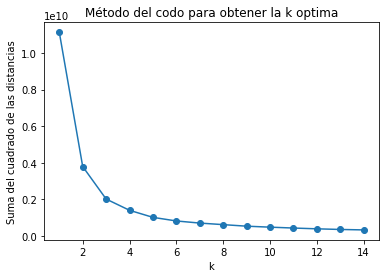

In [9]:
Sum_of_squared_distances = []

# Se usa k de 1 a 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state = 5)
    km = km.fit(x)
    # Se obtiene la suma de las distancias al cuadrado aplicando km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Gráfica de los resultados
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Suma del cuadrado de las distancias')
plt.title('Método del codo para obtener la k optima')
plt.show()

In [10]:
#Creamos el modelo de KMeans con 3 vecinos más cercanos y usando los centroides
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y = kmeans.fit_predict(x)
y

array([1, 2, 2, ..., 1, 2, 2], dtype=int32)

In [11]:
# Insertamos el cluster a al dataset
df['Cluster'] = y

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

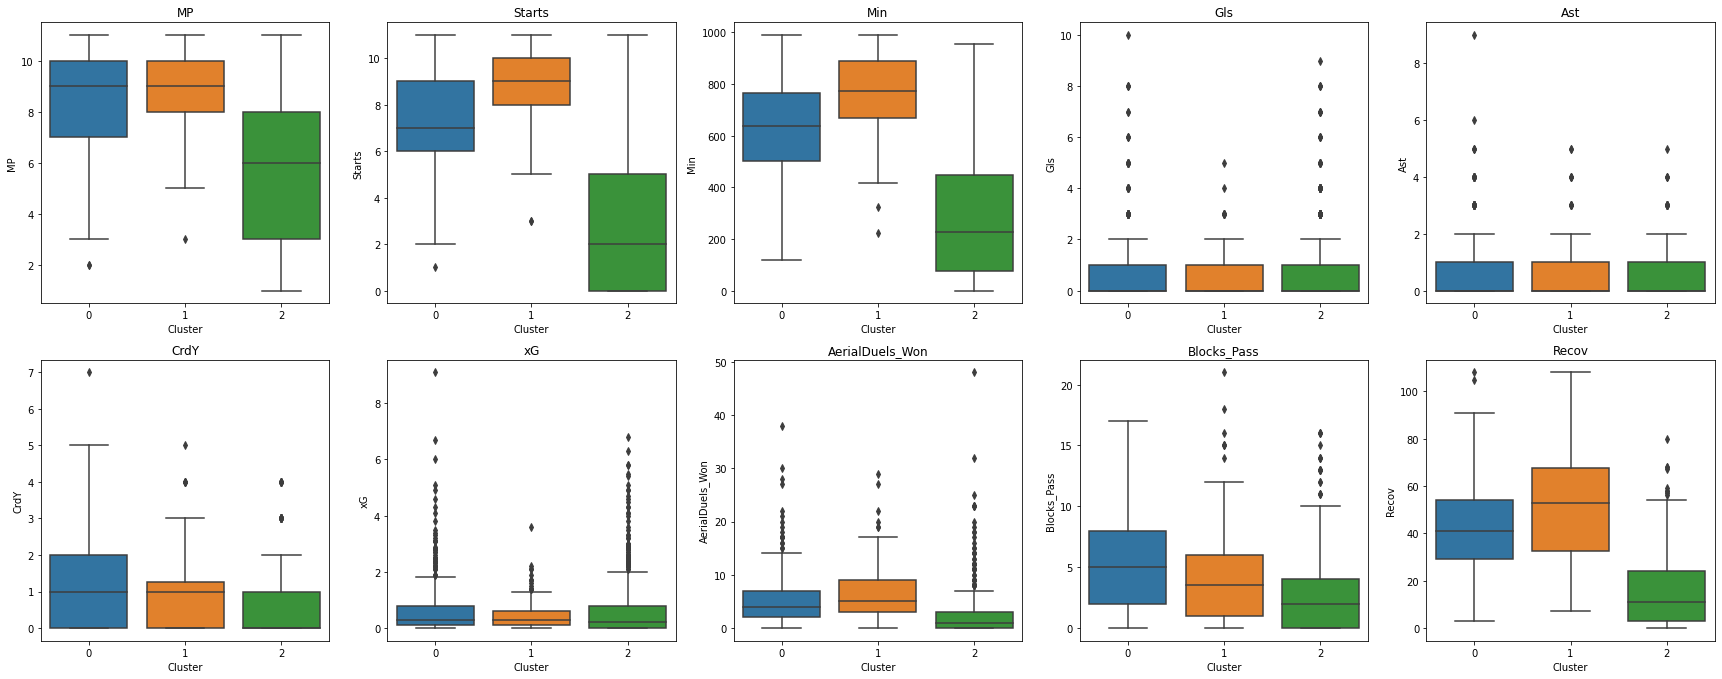

In [12]:
# Creamos un arreglo con el nombre de columnas
l=['MP', 'Starts', 'Min', 
   'Gls', 'Ast', 'CrdY', 'xG', 
   'AerialDuels_Won', 'Blocks_Pass', 
   'Recov']

# Creamos la figura
plt.figure(figsize=(30,30))

# Creamos los graficos comparando cada cluster con las columnas que guardamos
for i in range(len(l)):
    plt.subplot(5,5,i+1)
    sns.boxplot(df.Cluster,df[l[i]])
    plt.title(l[i])

In [13]:
# Mapeamos los valores unicos para cambiarlos
mapping = {"0": "MF", "1": "FW,MF", "2": "FW", "3": "GK", "4": "DF", "5": "MF,FW", "6": "DF,MF", "7": "MF,DF", "8": "DF,FW", "9": "FW,DF"}

# Remplazar los valores de Pos usando el mapeo
df['Pos'].replace(mapping, inplace=True)

In [14]:
df_0=df[df['Cluster']==0]
df_1=df[df['Cluster']==1]
df_2=df[df['Cluster']==2]

In [15]:
df_0

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp,Cluster
14,Nataša Andonova,mk MKD,"FW,MF",Levante,29,1993.0,10,10,830,5,...,32.0,11.0,0.0,0.0,0,41.0,10.0,5.0,0.0,0
22,Iris Arnaiz Gil,es ESP,"MF,DF",Real Sociedad,28,1994.0,7,6,559,0,...,1.0,6.0,0.0,0.0,0,42.0,13.0,3.0,0.0,0
25,Grace Asantewaa,gh GHA,"MF,FW",Real Betis,22,2000.0,11,9,732,0,...,1.0,8.0,0.0,0.0,0,63.0,10.0,10.0,0.0,0
26,Chelsea Ashurst,0,GK,Sporting Huelva,32,1990.0,4,4,360,0,...,0.0,0.0,0.0,0.0,0,5.0,1.0,0.0,0.0,0
28,Cristina Auñón,0,DF,Alavés,33,1989.0,10,9,786,2,...,13.0,16.0,0.0,1.0,0,52.0,2.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Annamaria Serturini,it ITA,"MF,DF",AS Roma,24,1998.0,10,9,661,2,...,52.0,4.0,0.0,0.0,0,43.0,1.0,5.0,186.0,0
1308,Flaminia Simonetti,it ITA,MF,Internazionale,25,1997.0,7,6,462,0,...,13.0,15.0,0.0,0.0,0,44.0,2.0,3.0,230.0,0
1313,Amanda Tampieri,it ITA,GK,UC Sampdoria,25,1997.0,9,9,810,0,...,0.0,0.0,0.0,0.0,0,9.0,4.0,0.0,137.0,0
1318,Sara Thrige,dk DEN,"DF,MF",AC Milan,26,1996.0,10,5,581,1,...,27.0,15.0,0.0,0.0,0,41.0,7.0,2.0,222.0,0


In [16]:
df_1

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp,Cluster
0,Teresa Abilleira,es ESP,MF,Real Madrid,22,2000.0,9,7,648,3,...,18.0,15.0,0.0,0.0,0,52.0,4.0,5.0,0.0,1
15,Ivana Andrés,es ESP,DF,Real Madrid,28,1994.0,7,7,630,0,...,0.0,4.0,0.0,0.0,0,50.0,4.0,3.0,0.0,1
17,Antonia,br BRA,DF,Levante,28,1994.0,8,8,662,0,...,20.0,26.0,0.0,0.0,0,45.0,4.0,6.0,0.0,1
27,María Asunción Quiñones,es ESP,GK,Athletic Club,26,1996.0,11,11,990,0,...,0.0,0.0,0.0,0.0,0,9.0,1.0,0.0,0.0,1
32,Doris Bačić,hr CRO,GK,Levante Planas,27,1995.0,10,10,900,0,...,0.0,1.0,0.0,0.0,0,8.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Linda Sembrant,se SWE,DF,Juventus,35,1987.0,7,6,565,0,...,0.0,3.0,0.0,1.0,0,37.0,6.0,4.0,452.0,1
1310,Giorgia Spinelli,it ITA,DF,UC Sampdoria,27,1994.0,10,10,900,1,...,0.0,12.0,0.0,1.0,0,71.0,15.0,7.0,269.0,1
1312,Anja Sønstevold,no NOR,DF,Internazionale,30,1992.0,11,11,974,0,...,36.0,21.0,0.0,0.0,0,67.0,3.0,13.0,456.0,1
1320,Alice Tortelli,it ITA,DF,Fiorentina,24,1998.0,11,11,990,0,...,1.0,20.0,0.0,0.0,0,57.0,7.0,6.0,373.0,1


In [17]:
df_2

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerialDuels_Won,AerialDuels_Lost,Cmp,Cluster
1,Jessica Aby,ci CIV,"FW,MF",Alavés,24,1998.0,10,4,383,1,...,3.0,7.0,0.0,0.0,0,21.0,6.0,11.0,0.0,2
2,Charity Adule,0,FW,Alhama,29,1993.0,1,0,14,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,0.0,2
3,Júlia Aguado,0,"FW,MF",Levante,22,2000.0,5,0,50,3,...,0.0,0.0,0.0,0.0,0,2.0,1.0,0.0,0.0,2
4,Yolanda Aguirre,es ESP,GK,Sevilla,24,1998.0,4,4,360,0,...,0.0,0.0,0.0,0.0,1,2.0,1.0,1.0,0.0,2
5,Rasheedat Ajibade,ng NGA,FW,Atlético Madrid,23,1999.0,11,8,706,4,...,19.0,4.0,1.0,0.0,0,39.0,7.0,4.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,Giorgia Tudisco,it ITA,"MF,DF",Sassuolo,27,1995.0,2,0,43,0,...,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,8.0,2
1323,Giulia Verrino,it ITA,FW,Parma Calcio 1913,18,2004.0,1,0,8,0,...,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,2.0,2
1324,Valery Vigilucci,it ITA,"MF,FW",AC Milan,25,1997.0,4,1,111,1,...,1.0,0.0,0.0,0.0,0,4.0,1.0,0.0,15.0,2
1326,Annie Williams,us USA,DF,Parma Calcio 1913,25,1997.0,6,4,417,0,...,2.0,7.0,0.0,0.0,0,45.0,2.0,2.0,122.0,2
